In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Abrimos la carpeta donde se encuentran las bases de datos
#os.chdir(r"C:/Users\s1248850/OneDrive - Syngenta/Documents/Rosario Luque/Ciencias de datos/TP/TP3")
os.chdir(r"c:\Users\s1290226\OneDrive - Syngenta\Desktop\UdeSA\Ciencia de datos\CC408-T2-3\TP4")
#os.chdir(r"C:\Users\clari\OneDrive\Documents\Tutoriales CD\CC408-T2-3\TP4")
#os.chdir(r"c:\Users\Teresa\Desktop\Cuarto año\Semestre de primavera\Ciencia de Datos\CC408-T2-3\TP4")

# Guardamos las bases de datos en en dos variables
ind_2004 = pd.read_stata("Individual_t104.dta")
hogar_2004 = pd.read_stata("Hogar_t104.dta")
ind_2024 = pd.read_excel("usu_individual_T124.xlsx")
hogar_2024 = pd.read_excel("usu_hogar_T124.xlsx")

In [3]:
ind_2004.shape, hogar_2004.shape, ind_2024.shape, hogar_2024.shape

((45289, 176), (12816, 88), (46050, 177), (16104, 88))

In [4]:
hogar_2024.columns

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'REALIZADA', 'REGION',
       'MAS_500', 'AGLOMERADO', 'PONDERA', 'IV1', 'IV1_ESP', 'IV2', 'IV3',
       'IV3_ESP', 'IV4', 'IV5', 'IV6', 'IV7', 'IV7_ESP', 'IV8', 'IV9', 'IV10',
       'IV11', 'IV12_1', 'IV12_2', 'IV12_3', 'II1', 'II2', 'II3', 'II3_1',
       'II4_1', 'II4_2', 'II4_3', 'II5', 'II5_1', 'II6', 'II6_1', 'II7',
       'II7_ESP', 'II8', 'II8_ESP', 'II9', 'V1', 'V2', 'V21', 'V22', 'V3',
       'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19_A', 'V19_B', 'IX_TOT', 'IX_MEN10',
       'IX_MAYEQ10', 'ITF', 'DECIFR', 'IDECIFR', 'RDECIFR', 'GDECIFR',
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH', 'VII1_1', 'VII1_2', 'VII2_1', 'VII2_2',
       'VII2_3', 'VII2_4'],
      dtype='object')

2. Descarguen la base de microdatos de la EPH correspondiente al primer trimestre de 2004 y 2024 en formato .dta y .xls, respectivamente. La base de hogares se llama Hogar_t104.dta y usu_hogar_T124.xls, respectivamente. Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base. Esto es, a la base de la encuesta individual de cada año (que usaron en el TP3) unan la base de la encuesta de hogar. Asegúrese de estar usando las variables CODUSU y NRO_Hogar para el merge.

Para poder trabajar con las cuatro bases de datos es necesario primero pasar el nombre de todas las columnas a minúscula. Esto nos permitirá luego concatenar las bases de datos en una sola y preservar la estructura de la información.

In [5]:
# En la base de datos del 2024 los nombres de las columnas están en mayúsculas.
# Entonces, cambiamos los nombres de las columnas a minúsculas.
ind_2024.columns = ind_2024.columns.str.lower()
hogar_2024.columns = hogar_2024.columns.str.lower()

#Just in case, hacemos lo mismo para las bases del 2004.
ind_2004.columns = ind_2004.columns.str.lower()
hogar_2004.columns = hogar_2004.columns.str.lower()

Ahora eliminamos todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires, y unimos ambos trimestres de hogares e individuos en una sola base.

In [6]:
# Contar el número de filas en el dataframe ind_2004 que son 'Ciudad de Buenos Aires' o 'Partidos del GBA' en la columna "aglomerado"
count_32_33 = ind_2004[ind_2004['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 para el año 2004 es: {count_32_33}")
# Contar el número de filas en el dataframe ind_2024 que tienen el valor 32 y 33 en la columna "aglomerado"
count_32_33_2024 = ind_2024[ind_2024['aglomerado'].isin([32, 33])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 para el año 2024 es: {count_32_33_2024}")
# Contar el número de filas en el dataframe hogar_2004 que son 'Ciudad de Buenos Aires' o 'Partidos del GBA' en la columna "aglomerado"
count_32_33_hogar = hogar_2004[hogar_2004['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 en la base de hogares para el año 2004 es: {count_32_33_hogar}")
# Contar el número de filas en el dataframe hogar_2024 que tienen el valor 32 y 33 en la columna "aglomerado"
count_32_33_hogar_2024 = hogar_2024[hogar_2024['aglomerado'].isin([32, 33])].shape[0]
print(f"El número de filas con aglomerado 32 y 33 en la base de hogares para el año 2024 es: {count_32_33_hogar_2024}")


El número de filas con aglomerado 32 y 33 para el año 2004 es: 7647
El número de filas con aglomerado 32 y 33 para el año 2024 es: 7051
El número de filas con aglomerado 32 y 33 en la base de hogares para el año 2004 es: 2351
El número de filas con aglomerado 32 y 33 en la base de hogares para el año 2024 es: 2545


In [7]:
# Primero filtramos los aglomerados de Ciudad Autónoma de Buenos Aires (32) y Gran Buenos Aires (33)
ind_2004 = ind_2004[ind_2004['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
ind_2024 = ind_2024[ind_2024['aglomerado'].isin([32, 33])]
hogar_2004 = hogar_2004[hogar_2004['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
hogar_2024 = hogar_2024[hogar_2024['aglomerado'].isin([32, 33])]

Antes de unir las bases de datos, vamos a quedarnos con las variables que usamos en el TP3 y vamos a reorganizar las variables. Seguramente tengamos que hacer esto con las bases de hogares, lo iremos haciendo al paso.

In [8]:
# Primero hacemos el recorte de variables de interés de la base de individuos en función de lo realizado en el tp3.
ind_2004 = ind_2004[['codusu', 'nro_hogar', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'v5_m', 'v11_m','v12_m', 'ipcf', 'pp02h', 'pp02i']]
ind_2024 = ind_2024[['codusu', 'nro_hogar', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'v5_m', 'v11_m','v12_m', 'ipcf', 'pp02h', 'pp02i']]
print(ind_2004.columns)
print(ind_2024.columns)

Index(['codusu', 'nro_hogar', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08',
       'nivel_ed', 'estado', 'cat_inac', 'v5_m', 'v11_m', 'v12_m', 'ipcf',
       'pp02h', 'pp02i'],
      dtype='object')
Index(['codusu', 'nro_hogar', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08',
       'nivel_ed', 'estado', 'cat_inac', 'v5_m', 'v11_m', 'v12_m', 'ipcf',
       'pp02h', 'pp02i'],
      dtype='object')


In [9]:
# Ahora ajustamos las variables de la base de invididuos del 2004 para que tengan el mismo formato que las de 2024.
# Se convierte a numérico los valores de ch06 (edades) de los datos de 2004, convirtiendo en na los valores que no son numeros.
ind_2004['ch06'] = pd.to_numeric(ind_2004['ch06'], errors='coerce')
# Ahora convertimos las variables de 2004 al formato numérico de 2024, para facilitar posteriormente el análisis.
#ch04=genero
ind_2004['ch04'] = ind_2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
ind_2004['ch04'] = pd.to_numeric(ind_2004['ch04'], errors='coerce')
#ch07= estado civil
ind_2004['ch07'] = ind_2004['ch07'].replace({'Unido': 1, 'Casado': 2,'Separado o divorciado':3, 'Viudo':4,'Ns./Nr.':9,'Soltero':5})
ind_2004['ch07'] = pd.to_numeric(ind_2004['ch07'], errors='coerce')
#ch08= estado de salud
mapeosalud = {'Obra social (incluye PAMI)': 1,'No paga ni le descuentan': 2,'Mutual/Prepaga/Servicio de emergencia': 3,'Obra social y mutual/prepaga/servicio de emergencia': 12,'Planes y seguros públicos': 3,'Ns./Nr.': 9,  'Obra social, mutual/prepaga/servicio de emergencia y planes': 123,'Obra social y planes y seguros públicos': 13,'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23}
ind_2004['ch08'] = ind_2004['ch08'].map(mapeosalud)
ind_2004['ch08'] = pd.to_numeric(ind_2004['ch08'], errors='coerce')
#nivel_ed= nivel educativo
mapeonivel = {'Primaria Incompleta (incluye educación especial)': 1,'Primaria Completa': 2,'Secundaria Incompleta': 3,'Secundaria Completa': 4,'Superior Universitaria Incompleta': 5,'Superior Universitaria Completa': 6,'Sin instrucción': 7,'Ns./ Nr.': 9  }
ind_2004['nivel_ed'] = ind_2004['nivel_ed'].map(mapeonivel)
ind_2004['nivel_ed'] = pd.to_numeric(ind_2004['nivel_ed'], errors='coerce')
#estado = estado laboral
mapeoestado = {'Entrevista individual no realizada (no respuesta al cuestion': 0,'Ocupado': 1,'Desocupado': 2,'Inactivo': 3,'Menor de 10 años': 4}
ind_2004['estado'] = ind_2004['estado'].map(mapeoestado)
ind_2004['estado'] = pd.to_numeric(ind_2004['estado'], errors='coerce')
#cat_inac= categoría de inactividad
mapeoinac = {'Jubilado / Pensionado': 1,'Rentista': 2,'Estudiante': 3,'Ama de casa': 4,'Menor de 6 años': 5,'Discapacitado': 6,'Otros': 7,0.0:9}
ind_2004['cat_inac'] = ind_2004['cat_inac'].map(mapeoinac)
ind_2004['cat_inac'] = pd.to_numeric(ind_2004['cat_inac'], errors='coerce')

ind_2004['ipcf'] = pd.to_numeric(ind_2004['ipcf'], errors='coerce')

ind_2004['pp02h'] = ind_2004['pp02h'].replace({'Sí': 1, 'No': 2, 0.0:9})
ind_2004['pp02h'] = pd.to_numeric(ind_2004['pp02h'], errors='coerce')

ind_2004['pp02i'] = ind_2004['pp02i'].replace({'Sí': 1, 'No': 2, 0.0:9})
ind_2004['pp02i'] = pd.to_numeric(ind_2004['pp02i'], errors='coerce')

ind_2004['v5_m'] = pd.to_numeric(ind_2004['v5_m'], errors='coerce')

ind_2004['v11_m'] = pd.to_numeric(ind_2004['v11_m'], errors='coerce')

ind_2004['v12_m'] = pd.to_numeric(ind_2004['v12_m'], errors='coerce')

C:\Users\s1290226\AppData\Local\Temp\ipykernel_38144\3468715733.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ind_2004['ch04'] = ind_2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
C:\Users\s1290226\AppData\Local\Temp\ipykernel_38144\3468715733.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  ind_2004['ch04'] = ind_2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
C:\Users\s1290226\AppData\Local\Temp\ipykernel_38144\3468715733.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To reta

In [10]:
print(ind_2004.shape, ind_2024.shape)

(7647, 16) (7051, 16)


In [11]:
# Ahora chequeamos si hay nulls en la base de datos de 2004
print(ind_2004.isnull().sum())
# Hay 135 nas en la variable ch06
# Hay 668 nas en la variable cat_inac
print(ind_2004.shape, ind_2024.shape)

codusu         0
nro_hogar      0
ano4           0
ch04           0
ch06         135
ch07           0
ch08           0
nivel_ed       0
estado         0
cat_inac     668
v5_m           0
v11_m          0
v12_m          0
ipcf           0
pp02h          0
pp02i          0
dtype: int64
(7647, 16) (7051, 16)


In [12]:
# Y si hay nulls en la base de datos de 2024
print(ind_2024.isnull().sum())
#No hay valores faltantes en la base de datos de 2024.
print(ind_2004.shape, ind_2024.shape)

codusu       0
nro_hogar    0
ano4         0
ch04         0
ch06         0
ch07         0
ch08         0
nivel_ed     0
estado       0
cat_inac     0
v5_m         0
v11_m        0
v12_m        0
ipcf         0
pp02h        0
pp02i        0
dtype: int64
(7647, 16) (7051, 16)


In [14]:
# Eliminamos los nas
ind_2004 = ind_2004.dropna()
print(ind_2004.shape, ind_2024.shape)
ind_2024 = ind_2024.dropna()
print(ind_2004.shape, ind_2024.shape)

(6847, 16) (7051, 16)
(6847, 16) (7051, 16)


In [15]:
# Chequeamos si hay valores negativos en edad (ch06)
print((ind_2004['ch06']<0).sum())
print((ind_2024['ch06']<0).sum())
#Hay 51 valores negativos de edad en la base del 2024.
print(ind_2004.shape, ind_2024.shape)

0
51
(6847, 16) (7051, 16)


In [16]:
#Eliminamos los valores de edad que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['ch06'] >= 0]
ind_2004 = ind_2004[ind_2004['ch06'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(6847, 16) (7000, 16)


In [17]:
# Chequeamos si hay valores negativos de IPCF.
print((ind_2004['ipcf']<0).sum())
print((ind_2024['ipcf']<0).sum())
# No hay valores negativos de IPCF en ninguna de las bases de datos.

0
0


In [18]:
# Chequeaamos si hay valores negativos de v5_m.
print((ind_2004['v5_m']<0).sum())
print((ind_2024['v5_m']<0).sum())
# Hay 42 valores negativos de v5_m en la base de 2024.

0
42


In [19]:
#Eliminamos los valores de v5_m que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['v5_m'] >= 0]
ind_2004 = ind_2004[ind_2004['v5_m'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(6847, 16) (6958, 16)


In [20]:
# Chequeamos si hay valores negativos de v11_m.
print((ind_2004['v11_m']<0).sum())
print((ind_2024['v11_m']<0).sum())
# Hay 14 valores negativos de v11_m en la base de 2024.

0
14


In [21]:
#Eliminamos los valores de v11_m que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['v11_m'] >= 0]
ind_2004 = ind_2004[ind_2004['v11_m'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(6847, 16) (6944, 16)


In [22]:
# Chequeaamos si hay valores negativos de v12_m.
print((ind_2004['v12_m']<0).sum())
print((ind_2024['v12_m']<0).sum())
# Hay 52 valores negativos de v12_m en la base de 2024.

0
46


In [23]:
#Eliminamos los valores de v12_m que sean menores a 0 en ambas bases de datos.
ind_2024 = ind_2024[ind_2024['v12_m'] >= 0]
ind_2004 = ind_2004[ind_2004['v12_m'] >= 0]
print(ind_2004.shape, ind_2024.shape)

(6847, 16) (6898, 16)


In [24]:
# Debido al problema de que las variables del 2004 hay que transformarlas nos vamos a quedar con una selección de variables.
# A partir del análisis del diseño del registro, nos vamos a quedar con las siguientes variables:
hogar_2004 = hogar_2004[['codusu', 'nro_hogar', 'ano4', 'iv3', 'iv4', 'iv5', 'iv9','iv12_1', 'ii7', 'v5', 'v6', 'v7', 'v11', 'ix_tot', 'ix_men10', 'ix_mayeq10', 'itf']]
hogar_2024 = hogar_2024[['codusu', 'nro_hogar', 'ano4', 'iv3', 'iv4', 'iv5', 'iv9','iv12_1', 'ii7', 'v5', 'v6', 'v7', 'v11', 'ix_tot', 'ix_men10', 'ix_mayeq10', 'itf']]

In [25]:
# Vamos a ver que valores únicos tienen las variables de la base de hogares de 2004.
print(hogar_2004['v11'].unique())
# Vamos a ver que valores únicos tiene las variables de la base de hogares de 2024.
print(hogar_2024['v11'].unique())

['No', 'Sí', 'Ns./Nr.']
Categories (4, object): [0.0 < 'Sí' < 'No' < 'Ns./Nr.']
[2 1 9]


In [26]:
# Dado que la base de datos de hogares del 2004 tiene la descripción como valor en vez del valor numérico, vamos a cambiarlo.
mapeo_iv3 = {'Mosaico/baldosa/madera/cerámica/alfombra':1, 'Cemento/ladrillo fijo':2, 'Ladrillo suelto/tierra':3, 'Otro':4, 0.0:9}
hogar_2004['iv3'] = hogar_2004['iv3'].map(mapeo_iv3)
hogar_2004['iv3'] = pd.to_numeric(hogar_2024['iv3'], errors='coerce')

mapeo_iv4 = {'Membrana/cubierta asfáltica':1, 'N/S. Depto. de propiedad horizontal':9, 'Baldosa/losa sin cubierta':2, 'Chapa de metal sin cubierta':4, 'Chapa de fibrocemento/plástico':5, 'Pizarra/teja':3, 0.0:9, 'Chapa de cartón':6}
hogar_2004['iv4'] = hogar_2004['iv4'].map(mapeo_iv4)
hogar_2004['iv4'] = pd.to_numeric(hogar_2024['iv4'], errors='coerce')

hogar_2004['iv5'] = hogar_2004['iv5'].replace({'Sí':1, 'No':2, 'Ns./Nr.':9, 0.0:9})
hogar_2004['iv5'] = pd.to_numeric(hogar_2004['iv5'], errors='coerce')

mapeo_iv9 = {'Dentro de la vivienda': 1, 'Fuera de la vivienda pero dentro del terreno': 2, 'Fuera del terreno':3, 0.0:9}
hogar_2004['iv9'] = hogar_2004['iv9'].map(mapeo_iv9)
hogar_2004['iv9'] = pd.to_numeric(hogar_2024['iv9'], errors='coerce')

hogar_2004['iv12_1'] = hogar_2004['iv12_1'].replace({'Sí': 1, 'No': 2, 0.0:9})
hogar_2004['iv12_1'] = pd.to_numeric(hogar_2004['iv12_1'], errors='coerce')

mapeo_ii7 = {'Otra situación':9, 'Propietario de la vivienda y el terreno':1, 'Inquilino/arrendatario de la vivienda':3, 'Ocupante por pago de impuestos/expensas':4, 'Propietario de la vivienda solamente':2, 'Ocupante gratuito (con permiso)':6, 'Ocupante en relación de dependencia':5, 'Ocupante de hecho (sin permiso)':7, 'Está en sucesión':8,0.0:9}
hogar_2004['ii7'] = hogar_2004['ii7'].map(mapeo_ii7)
hogar_2004['ii7'] = pd.to_numeric(hogar_2024['ii7'], errors='coerce')

hogar_2004['v5'] = hogar_2004['v5'].replace({'Sí': 1, 'No': 2, 'Ns./Nr.': 9, 0.0:9})
hogar_2004['v5'] = pd.to_numeric(hogar_2004['v5'], errors='coerce')

hogar_2004['v6'] = hogar_2004['v6'].replace({'Sí': 1, 'No': 2, 'Ns./Nr.': 9, 0.0:9})
hogar_2004['v6'] = pd.to_numeric(hogar_2004['v6'], errors='coerce')

hogar_2004['v7'] = hogar_2004['v7'].replace({'Sí': 1, 'No': 2, 'Ns./Nr.': 9, 0.0:9})
hogar_2004['v7'] = pd.to_numeric(hogar_2004['v7'], errors='coerce')

hogar_2004['v11'] = hogar_2004['v11'].replace({'Sí': 1, 'No': 2, 'Ns./Nr.': 9, 0.0:9})
hogar_2004['v11'] = pd.to_numeric(hogar_2004['v11'], errors='coerce')

hogar_2004['ix_tot'] = pd.to_numeric(hogar_2004['ix_tot'], errors='coerce')

hogar_2004['ix_men10'] = pd.to_numeric(hogar_2004['ix_men10'], errors='coerce')

hogar_2004['ix_mayeq10'] = pd.to_numeric(hogar_2004['ix_mayeq10'], errors='coerce')

hogar_2004['itf'] = pd.to_numeric(hogar_2004['itf'], errors='coerce')

C:\Users\s1290226\AppData\Local\Temp\ipykernel_38144\3463664367.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hogar_2004['iv5'] = hogar_2004['iv5'].replace({'Sí':1, 'No':2, 'Ns./Nr.':9, 0.0:9})
C:\Users\s1290226\AppData\Local\Temp\ipykernel_38144\3463664367.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hogar_2004['iv5'] = hogar_2004['iv5'].replace({'Sí':1, 'No':2, 'Ns./Nr.':9, 0.0:9})
C:\Users\s1290226\AppData\Local\Temp\ipykernel_38144\3463664367.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remov

In [27]:
#Chequeo el número de nas para las variables seleccionadas.
print(hogar_2004.isnull().sum())
# Dado que las variables iv3, iv4, iv9, ii7 e ix_men10 tienen muchos nans, los vamos a excluir de la base de datos.
hogar_2004 = hogar_2004.drop(['iv3', 'iv4', 'iv9', 'ii7', 'ix_men10'], axis=1)

codusu           0
nro_hogar        0
ano4             0
iv3           2075
iv4           2075
iv5              0
iv9           2075
iv12_1           0
ii7           2075
v5               0
v6               0
v7               0
v11              0
ix_tot           0
ix_men10      1576
ix_mayeq10       0
itf              0
dtype: int64


In [28]:
# Vuelvo a chequear si hay valores faltantes en la base de datos de hogares de 2004.
print(hogar_2004.isnull().sum())

codusu        0
nro_hogar     0
ano4          0
iv5           0
iv12_1        0
v5            0
v6            0
v7            0
v11           0
ix_tot        0
ix_mayeq10    0
itf           0
dtype: int64


In [29]:
# Ahora chequeamos los valores faltantes para la base del 2024.
print(hogar_2024.isnull().sum())
# Y eliminamos las mismas columnas que en la base de 2004 para no generar nas en el merge.
hogar_2024 = hogar_2024.drop(['iv3', 'iv4', 'iv9', 'ii7', 'ix_men10'], axis=1)

codusu        0
nro_hogar     0
ano4          0
iv3           0
iv4           0
iv5           0
iv9           0
iv12_1        0
ii7           0
v5            0
v6            0
v7            0
v11           0
ix_tot        0
ix_men10      0
ix_mayeq10    0
itf           0
dtype: int64


In [30]:
# Vuelvo a chequear si hay valores faltantes en la base de datos de hogares de 2004.
print(hogar_2004.isnull().sum())

codusu        0
nro_hogar     0
ano4          0
iv5           0
iv12_1        0
v5            0
v6            0
v7            0
v11           0
ix_tot        0
ix_mayeq10    0
itf           0
dtype: int64


In [31]:
#Chequeo que las variables itf, ix_mayeq10, e ix_tot no tengan valores negativos.
print((hogar_2004['itf']<0).sum())
print((hogar_2004['ix_mayeq10']<0).sum())
print((hogar_2004['ix_tot']<0).sum())

0
0
0


In [32]:
#Chequeo que las variables itf, ix_men10, e ix_tot no tengan valores negativos.
print((hogar_2024['itf']<0).sum())
print((hogar_2024['ix_mayeq10']<0).sum())
print((hogar_2024['ix_tot']<0).sum())

0
0
0


In [33]:
ind_2004.shape, hogar_2004.shape, ind_2024.shape, hogar_2024.shape

((6847, 16), (2351, 12), (6898, 16), (2545, 12))

Ahora sí, una vez eliminados los valores faltantes y los valores sin sentido, además de transformar las variables, procedemos a unir las bases de datos.

In [34]:
# Verificar las claves en todas las bases
claves = ["codusu", "nro_hogar"]
for df, name in zip([ind_2004, hogar_2004, ind_2024, hogar_2024],
                    ["individual_2004", "hogar_2004", "individual_2024", "hogar_2024"]):
    if not all(clave in df.columns for clave in claves):
        raise ValueError(f"Faltan claves en la base {name}")

# Unir las bases individuales y de hogar para cada año
base_2004 = pd.merge(ind_2004, hogar_2004, on=claves, how="inner")
base_2024 = pd.merge(ind_2024, hogar_2024, on=claves, how="inner")

# Agregar columna de año
base_2004["Año"] = 2004
base_2024["Año"] = 2024

# Combinar ambas bases en un solo DataFrame
base_final = pd.concat([base_2004, base_2024], ignore_index=True)

In [35]:
base_final.shape


(13745, 27)

3. Limpien la base de datos tomando criterios que hagan sentido. Explicar cualquier decisión como el tratamiento de valores faltantes (missing values), extremos (outliers), o variables categóricas. Justifique sus decisiones.

In [36]:
# Check for missing values in base_final
missing_values_base_final = base_final.isnull().sum()
missing_columns_base_final = missing_values_base_final[missing_values_base_final > 0]

if not missing_columns_base_final.empty:
    print("Columnas con valores faltantes y su cantidad de NAs:")
    print(missing_columns_base_final)
else:
    print("No hay columnas con valores faltantes en base_final.")

No hay columnas con valores faltantes en base_final.


In [488]:
base_final.to_excel("base_final.xlsx", index=False)

In [ ]:
# Antes de chequear outliers con el MAD, es importante eliminar el valor 9 de todas las columnas que lo tengan.
# El 9 es equivalente a 'Ns./Nr.' en las bases de datos, lo cual sigue siendo un missing value.
#base_final = base_final.replace(9, np.nan)
# Eliminamos los valores faltantes
#base_final = base_final.dropna()
#base_final.shape

(8717, 27)

Ahora vamos a chequear outliers

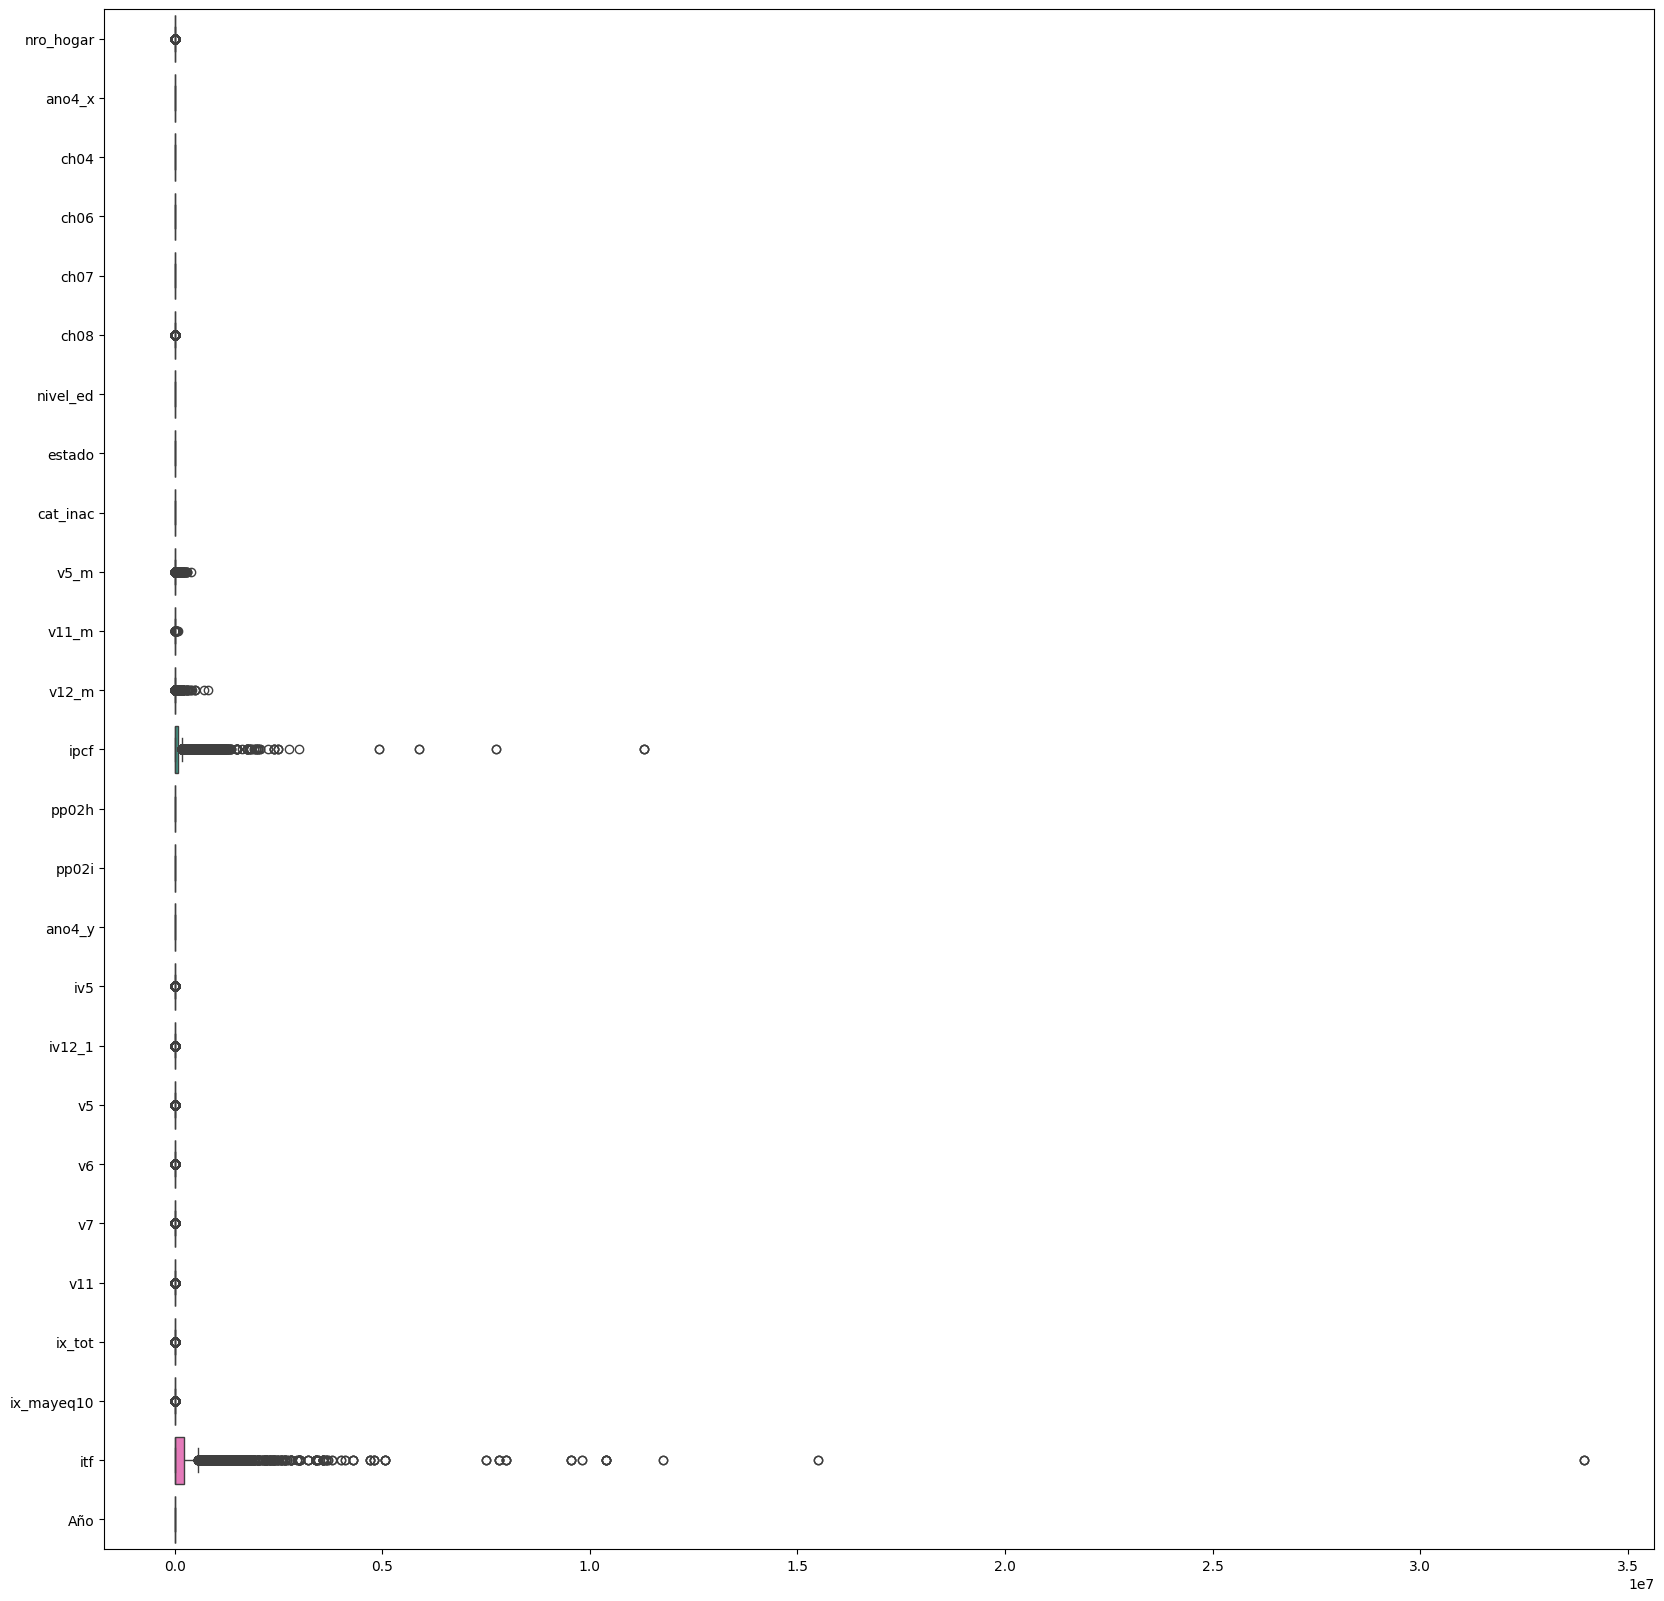

In [37]:
# Lo primero que debemos hacer es plotear boxplots para ver la distribución de las variables.
plt.figure(figsize=(20, 20))
sns.boxplot(data=base_final, orient="h")
plt.show()
# Vemos que ipcf e itf, las variables de ingreso, parecieran tener outliers. Ninguna variable toma valores negativos,
# por lo que la limpieza previa funcionó.

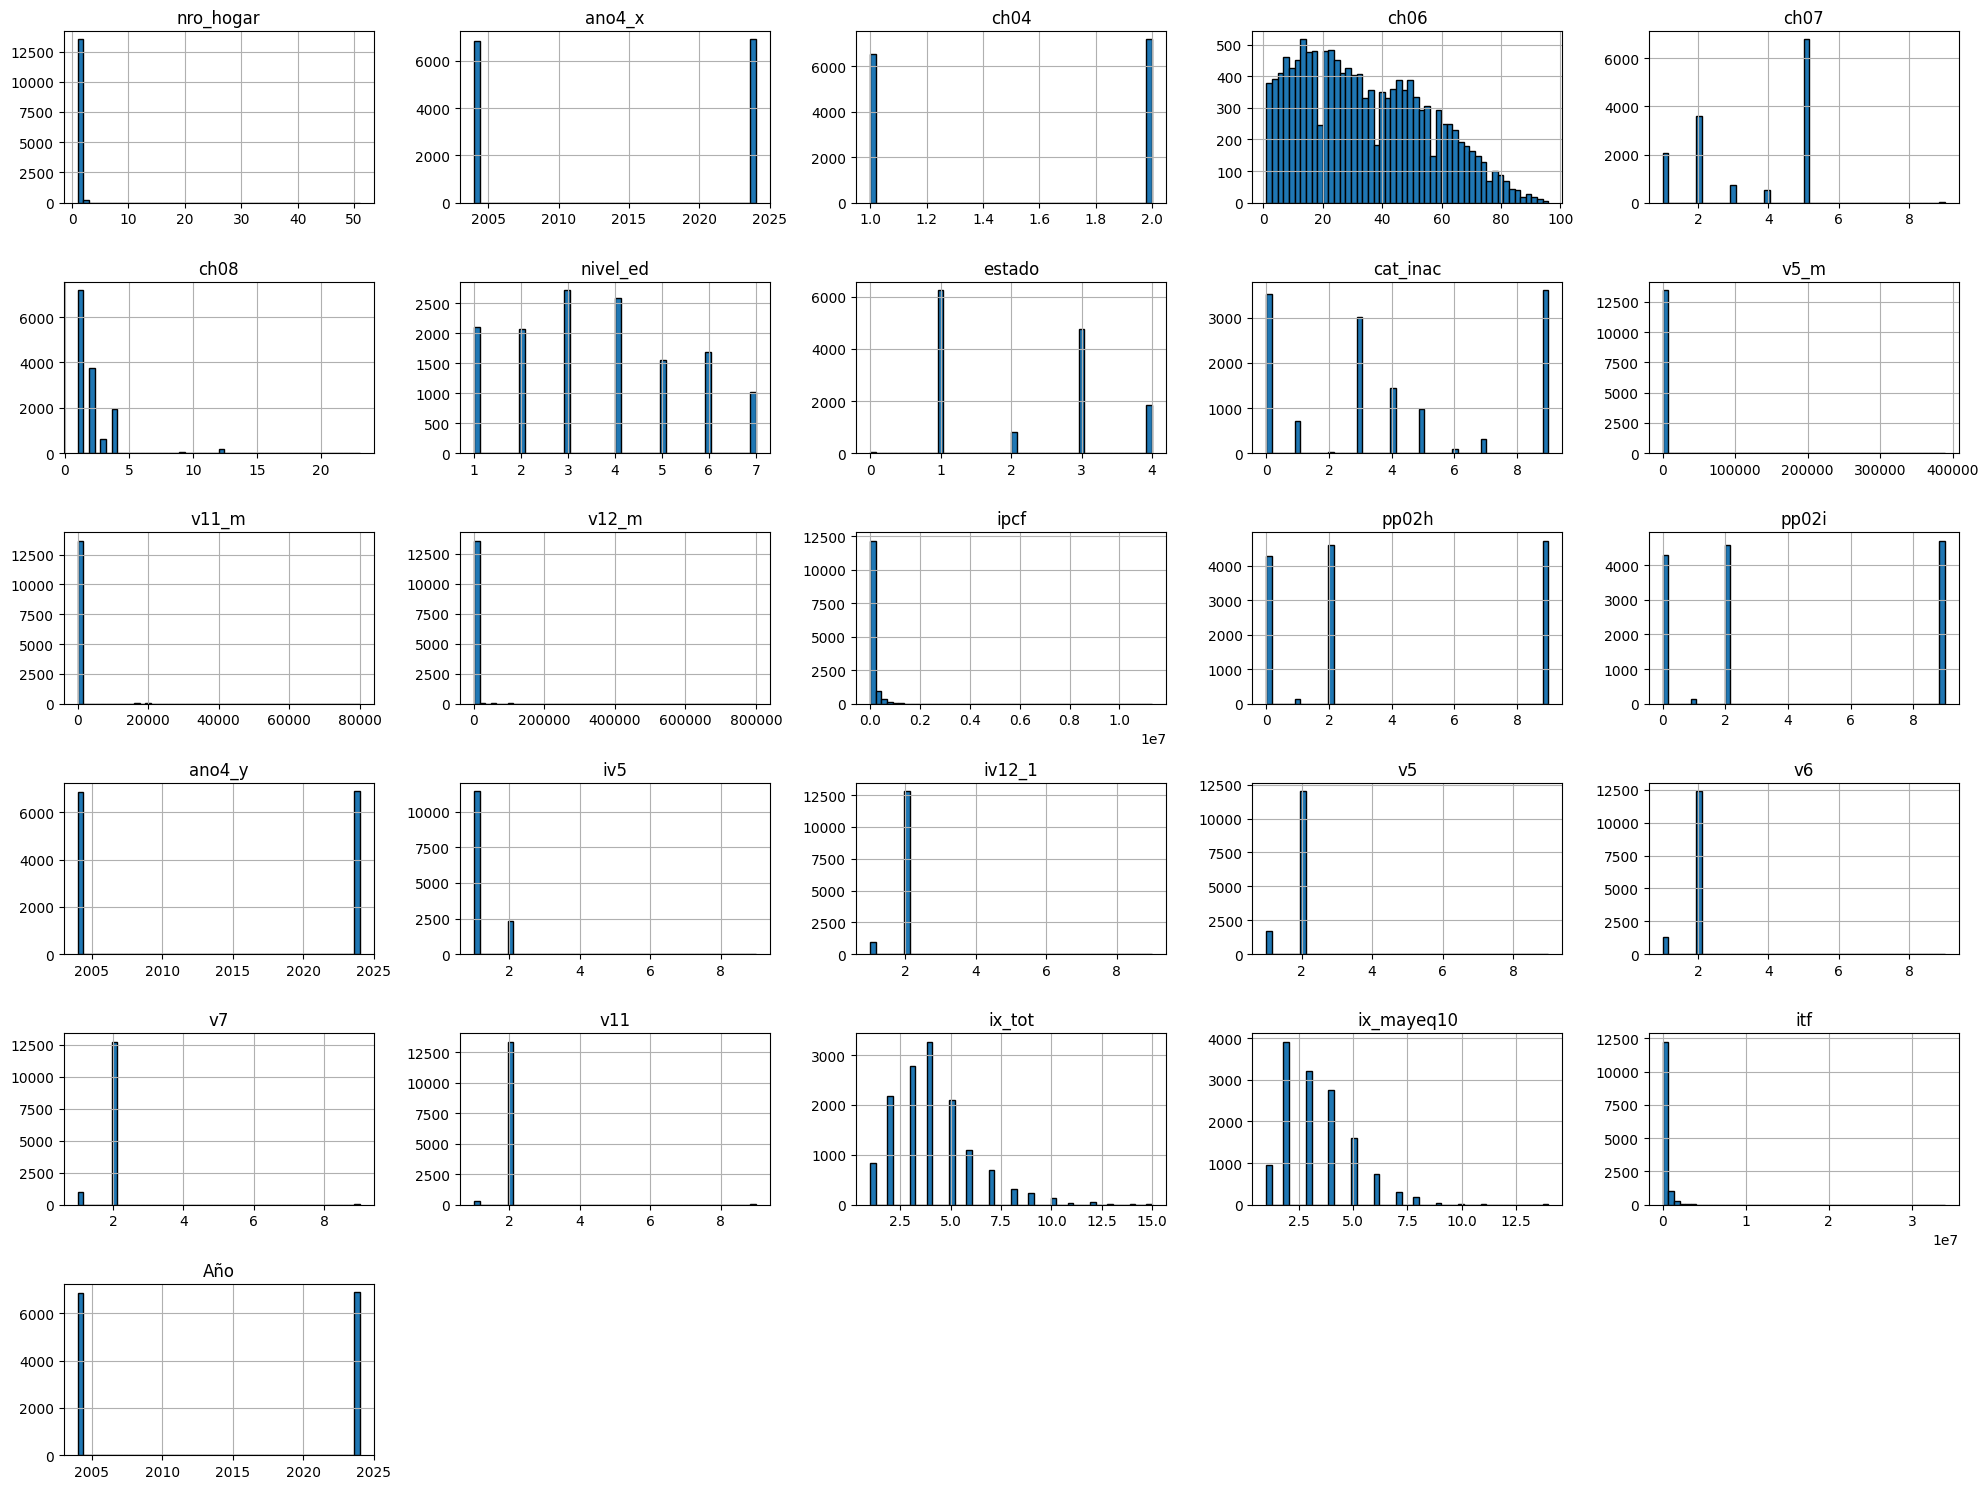

In [38]:
# Otra herramienta útil para ver la distribución de las variables es el histograma.
#El histograma nos permite ver si es necesario transformar alguna variable.
base_final.hist(figsize=(20, 15), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
# Quiero eliminar las variables que toman 0 en pp02h.
#base_final = base_final[base_final['pp02h'] != 0]
#base_final.shape

(4614, 27)

In [ ]:
# Quiero eliminar las variables que toman 0 en pp02i.
#base_final = base_final[base_final['pp02i'] != 0]
#base_final.shape

(4614, 27)

In [39]:
# Ahora sí, vamos a proceder a identificar los outliers las columnas de interés.
# Para ello, vamos a usar el método de la desviación absoluta media (MAD).
# Install pyod package
#%pip install pyod

# Import MAD estimator
from pyod.models.mad import MAD

# Se suele utilizar un umbral de 3.5 para considerar que un punto de datos es un outlier.
mad = MAD(threshold = 3.5)
columns_with_outliers = ['ch06', 'ch08', 'v5_m', 'v11_m', 'v12_m', 'ipcf', 'itf', 'ix_tot', 'ix_mayeq10']

for column in columns_with_outliers:
    # Para calcular el Z-score modificado, primero debemos tranformar las columnas en 2D numpy arrays.
    total_reshaped = base_final[column].values.reshape(-1, 1)

    # Clasificamos los puntos de datos en outliers (1) y no outliers (0)
    labels = mad.fit(total_reshaped).labels_
    print(f'Outliers for {column}: {np.sum(labels == 1)}')

Outliers for ch06: 0
Outliers for ch08: 6556
Outliers for v5_m: 366
Outliers for v11_m: 80
Outliers for v12_m: 320
Outliers for ipcf: 4115
Outliers for itf: 4027
Outliers for ix_tot: 280
Outliers for ix_mayeq10: 79


c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\pyod\models\mad.py:129: RuntimeWarning: divide by zero encountered in divide
  return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff_))
c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\pyod\models\mad.py:129: RuntimeWarning: invalid value encountered in divide
  return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff_))
c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\pyod\models\mad.py:129: RuntimeWarning: divide by zero encountered in divide
  return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff_))
c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\pyod\models\mad.py:129: RuntimeWarning: invalid value encountered in divide

In [40]:
# Por último, filtramos los outliers de cada columna y nos quedamos con un nuevo df.
df_unificado = base_final.copy()
df_unificado = df_unificado[labels == 0]
df_unificado.shape

(13666, 27)

4. Construya variables (mínimo 3) que no estén en la base pero que sean relevantes para predecir individuos desocupados (por ejemplo, la proporción de personas que trabajan en el hogar).

In [41]:
print(df_unificado['estado'].unique())

[1 3 2 4 0]


In [42]:
# Primero, vamos a crear las variables que utilizamos en el tp3 para la predicción del desempleo.
# La columna PEA (Población Económicamente Activa) que toma 1 si están ocupados o desocupados en ESTADO.
df_unificado['PEA'] = df_unificado['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

In [43]:
print(df_unificado['PEA'].unique())

[1 0]


In [44]:
# La columna PET (Población en Edad para Trabajar) toma 1 si están la persona tiene entre 15 y 65 años cumplidos. 
df_unificado['PET'] = df_unificado['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

In [45]:
print(df_unificado['PET'].unique())

[0 1]


In [46]:
# Agregamos una columna llamada desocupado que tome 1 si esta desocupada
df_unificado['desocupado'] = df_unificado['estado'].apply(lambda x: 1 if x == 2 else 0)


In [47]:
print(df_unificado['desocupado'].unique())

[0 1]


In [48]:
# Ahora vamos a crear una nueva columna que contenga la proporción de personas que trabajan en el hogar.
# Para esto, vamos a dividir la cantidad de personas ocupadas en el hogar por la cantidad total de personas en el hogar.
df_unificado['prop_ocupados'] = df_unificado['PEA'] / df_unificado['ix_tot']

# Ahora vamos a crear una nueva columna que contenga la proporción de personas que reciben subsidio o ayuda social en el hogar.
# Para esto, vamos a dividir la cantidad de personas que reciben subsidio o ayuda social en el hogar por la cantidad total de personas en el hogar.
df_unificado['prop_subsidio'] = base_final['v5'] / df_unificado['ix_tot']

# Crear una nueva columna que contenga la proporción de personas menores de 10 años en el hogar.
# Para esto, vamos a dividir la cantidad de personas menores de 10 años en el hogar por la cantidad total de personas en el hogar.
df_unificado['prop_menores_10'] = df_unificado['ix_mayeq10'] / df_unificado['ix_tot']

5. Presenten estadísticas descriptivas de tres variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir la desocupación. Comenten las estadísticas obtenidas.

Por último, vamos a crear dummmys de todas las variables que son categóricas para las regresiones.

In [49]:
#Transformamos género en binaria 
df_unificado['ch04_2'] = df_unificado['ch04'].replace({1: 0, 2: 1})

#Creamos dummies para ch07 
dummies_ch07 = pd.get_dummies(df_unificado['ch07'], prefix='ch07', drop_first=False)

#Cremamos dummies para ch08
dummies_ch08 = pd.get_dummies(df_unificado['ch08'], prefix='ch08', drop_first=False)

#Creamos dummies para nivel_ed
dummies_nivel_ed = pd.get_dummies(df_unificado['nivel_ed'], prefix='nivel_ed', drop_first=False)

#Creanis dummies para cat_inac
dummies_cat_inac = pd.get_dummies(df_unificado['cat_inac'], prefix='cat_inac', drop_first=False)

#Transformamos pp02h en binaria
df_unificado['pp02h_2'] = df_unificado['pp02h'].replace({1: 0, 2: 1})

#Transformamos pp02i en binaria
df_unificado['pp02i_2'] = df_unificado['pp02i'].replace({1: 0, 2: 1})

#Transformamos iv5 en binaria
df_unificado['iv5_2'] = df_unificado['iv5'].replace({1: 0, 2: 1})

#Transformamos iv12_1 en binaria
df_unificado['iv12_1_2'] = df_unificado['iv12_1'].replace({1: 0, 2: 1})

#Transformamos v5 en binaria
df_unificado['v5_2'] = df_unificado['v5'].replace({1: 0, 2: 1})

#Transformamos v6 en binaria
df_unificado['v6_2'] = df_unificado['v6'].replace({1: 0, 2: 1})

#Transformamos v7 en binaria
df_unificado['v7_2'] = df_unificado['v7'].replace({1: 0, 2: 1})

#Transformamos v11 en binaria
df_unificado['v11_2'] = df_unificado['v11'].replace({1: 0, 2: 1})

#Creamos un nuevo dataframe con las variables dummies
df_unificado_2 = pd.concat([df_unificado, dummies_ch07, dummies_ch08, dummies_nivel_ed, dummies_cat_inac], axis=1)

print(df_unificado_2.columns)
print(df_unificado_2.head())

Index(['codusu', 'nro_hogar', 'ano4_x', 'ch04', 'ch06', 'ch07', 'ch08',
       'nivel_ed', 'estado', 'cat_inac', 'v5_m', 'v11_m', 'v12_m', 'ipcf',
       'pp02h', 'pp02i', 'ano4_y', 'iv5', 'iv12_1', 'v5', 'v6', 'v7', 'v11',
       'ix_tot', 'ix_mayeq10', 'itf', 'Año', 'PEA', 'PET', 'desocupado',
       'prop_ocupados', 'prop_subsidio', 'prop_menores_10', 'ch04_2',
       'pp02h_2', 'pp02i_2', 'iv5_2', 'iv12_1_2', 'v5_2', 'v6_2', 'v7_2',
       'v11_2', 'ch07_1', 'ch07_2', 'ch07_3', 'ch07_4', 'ch07_5', 'ch07_9',
       'ch08_1', 'ch08_2', 'ch08_3', 'ch08_4', 'ch08_9', 'ch08_12', 'ch08_13',
       'ch08_23', 'nivel_ed_1', 'nivel_ed_2', 'nivel_ed_3', 'nivel_ed_4',
       'nivel_ed_5', 'nivel_ed_6', 'nivel_ed_7', 'cat_inac_0.0',
       'cat_inac_1.0', 'cat_inac_2.0', 'cat_inac_3.0', 'cat_inac_4.0',
       'cat_inac_5.0', 'cat_inac_6.0', 'cat_inac_7.0', 'cat_inac_9.0'],
      dtype='object')
     codusu  nro_hogar  ano4_x  ch04  ch06  ch07  ch08  nivel_ed  estado  \
0  125397          1.0  

#### Parte II: Clasificación y regularización

1. Para cada año, partan la base respondieron en una base de prueba y una de entrenamiento (X_train, y_train, X_test, y_test) utilizando
el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state
instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

Antes de hacer esto, sería importante considerar el feedback que nos dejó Nacho.
Parte II:
#### Creo que, si bien hicieron unas variables que tienen sentido ordinal, para los modelos hubiera creado dummies para las variables categóricas. Es más seguro.
- Habría que preguntarle si crear dummies para absolutamente todas las variables categóricas que tiene la base final.
#### Hay algún problema con la convergencia de la regresión logística, no termino de entender por qué.
- Si ahora la parte de preprocesamiento de datos está bien, esto no debería volver a pasar. 
#### Me gustan mucho las figuras de ROC de todos los modelos juntos, pero por algún motivo que no comprendo les dieron valores de Accuracy y AUC bastante peores que sus compañeras. Igual se los consideré bien porque los modelos están bien hechos (salvo el tema de las dummies).
- Idem al anterior
#### Definitivamente no hubiera utilizado la variable PEA para el entrenamiento de los modelos. Piensen que para crearla utilizaron la variable estado.
- Tener en mente la posibilidad de sacar las variables madres de otras variables que creemos. Si podemos pensar entre todas que variables que podamos crear nos evitaría tener tantas variables categóricas, como en el caso de PEA, nos ahorraría tiempo.
#### Sacar la variable estado de la base final

In [50]:
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler



Variables que hay que droppear: 'codusu', 'nro_hogar', 'ano4_x', 'ch04', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'pp02h', 'pp02i', 'ano4_y', 'iv5', 'iv12_1', 'v5', 'v6', 'v7', 'v11'

In [51]:
#hago solo un df con las variables dummisadas
df_regresion = df_unificado_2.drop(['codusu', 'nro_hogar', 'ano4_x', 'ch04', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ano4_y', 'pp02h', 'pp02i','iv5', 'iv12_1', 'v5', 'v6', 'v7', 'v11'], axis=1)
df_regresion.head

<bound method NDFrame.head of        ch06  v5_m  v11_m  v12_m   ipcf  ix_tot  ix_mayeq10     itf   Año  PEA  \
0      67.0   0.0    0.0    0.0    0.0     1.0         1.0     0.0  2004    1   
1      54.0   0.0    0.0    0.0  532.5     4.0         4.0  2130.0  2004    1   
2      51.0   0.0    0.0    0.0  532.5     4.0         4.0  2130.0  2004    0   
3      25.0   0.0    0.0    0.0  532.5     4.0         4.0  2130.0  2004    1   
4      20.0   0.0    0.0    0.0  532.5     4.0         4.0  2130.0  2004    1   
...     ...   ...    ...    ...    ...     ...         ...     ...   ...  ...   
13740  43.0   0.0    0.0    0.0    0.0     5.0         5.0     0.0  2024    1   
13741  21.0   0.0    0.0    0.0    0.0     5.0         5.0     0.0  2024    0   
13742  20.0   0.0    0.0    0.0    0.0     5.0         5.0     0.0  2024    0   
13743  11.0   0.0    0.0    0.0    0.0     5.0         5.0     0.0  2024    0   
13744  24.0   0.0    0.0    0.0    0.0     5.0         5.0     0.0  2024    0  

In [53]:
print(df_regresion['desocupado'].unique())

[0 1]


In [54]:
# Entrenaremos con el 70% de la base de datos del 2004 y el resto se usarán para testear 
# el modelo obtenido
# Split the data into training and testing sets
# Filtrar los datos para 2004
unificado_2004 = df_regresion[df_regresion['Año'] == 2004.0]

# Filtrar los datos para 2024
unificado_2024 = df_regresion[df_regresion['Año'] == 2024.0]

# Dividir los datos de 2004 en conjuntos de entrenamiento y prueba
train2004, test2004 = train_test_split(unificado_2004, test_size=0.3, random_state=101)

# Dividir los datos de 2024 en conjuntos de entrenamiento y prueba
train2024, test2024 = train_test_split(unificado_2024, test_size=0.3, random_state=101)
# Define the dependent variable y and the independent variables X
y_train_2004 = train2004[['desocupado']]
X_train_2004 = train2004.drop(columns=['desocupado'])

y_test_2004 = test2004[['desocupado']]
X_test_2004 = test2004.drop(columns=['desocupado'])

# Add a column of ones to X_train and X_test
X_train_2004 = X_train_2004.assign(intercept=1)
X_test_2004 = X_test_2004.assign(intercept=1)

# Repito lo mismo para el 2024
train2024, test2024 = train_test_split(unificado_2024, test_size=0.3, random_state=101)
# Define the dependent variable y and the independent variables X
y_test_2024 = test2024[['desocupado']]
X_test_2024 = test2024.drop(columns=['desocupado'])

y_train_2024 = train2024[['desocupado']]
X_train_2024 = train2024.drop(columns=['desocupado'])

In [55]:
y_train_2004 == 0

,desocupado
2249,True
1864,True
6470,False
1376,True
3544,True
...,...
599,True
5754,True
1361,True
1547,False


In [56]:
# Revisamos cuantas observaciones quedaron para Test y cuantas para Entrenamiento.
print(f'El conjunto de entrenamiento del 2004 tiene {len(X_train_2004)} observaciones.')
print(f'El conjunto de test del 2004 tiene {len(X_test_2004)} observaciones.')
print(f'El conjunto de entrenamiento del 2024 tiene {len(X_train_2024)} observaciones.')
print(f'El conjunto de test del 2024 tiene {len(X_test_2024)} observaciones.')

El conjunto de entrenamiento del 2004 tiene 4751 observaciones.
El conjunto de test del 2004 tiene 2037 observaciones.
El conjunto de entrenamiento del 2024 tiene 4814 observaciones.
El conjunto de test del 2024 tiene 2064 observaciones.


Expliquen brevemente cómo elegirían λ por validación cruzada (en Python es alpha). Detallen por qué no usarían el conjunto de prueba (test) para su elección

En validación cruzada, ¿cuáles son las implicancias de usar un k muy
pequeño o uno muy grande? Cuando k = n (con n el número de
muestras), ¿cuántas veces se estima el modelo?

Para regresión logística, implementen la penalidad, L1 como la de
LASSO y L2 como la de Ridge con λ = 1 (como en la Tutorial 10), usando
la opción penalty y reporten la matriz de confusión, la curva ROC, los
valores de AUC y de Accuracy para cada año.1 ¿Cómo cambiaron los
resultados con respecto al TP3? ¿La performance de regresión logística
con regularización es mejor o peor?

In [57]:
#antes de hacer la regresión, necesitamos estandarizar las variables
# Estadisticas antes de estandarizar, base 2004
X_train_2004.describe().T

,count,mean,std,min,25%,50%,75%,max
ch06,4751.0,30.602189,19.607421,1.000000,14.000000,28.000000,45.000000,94.00
v5_m,4751.0,2.431067,21.272523,0.000000,0.000000,0.000000,0.000000,375.00
v11_m,4751.0,0.373395,11.483953,0.000000,0.000000,0.000000,0.000000,500.00
v12_m,4751.0,6.962113,89.571193,0.000000,0.000000,0.000000,0.000000,4500.00
ipcf,4751.0,363.210303,887.141069,0.000000,116.666667,212.500000,426.666667,54000.00
ix_tot,4751.0,4.386234,1.928308,1.000000,3.000000,4.000000,5.000000,13.00
ix_mayeq10,4751.0,3.516733,1.539270,1.000000,2.000000,3.000000,4.000000,8.00
itf,4751.0,1271.181225,1506.632933,0.000000,500.000000,900.000000,1530.000000,54000.00
Año,4751.0,2004.000000,0.000000,2004.000000,2004.000000,2004.000000,2004.000000,2004.00
PEA,4751.0,0.523048,0.499521,0.000000,0.000000,1.000000,1.000000,1.00


In [58]:
# Estadisticas antes de estandarizar
X_train_2024.describe().T


,count,mean,std,min,25%,50%,75%,max
ch06,4814.0,38.397175,2.276771e+01,1.000000,19.00,37.000,56.000000,96.00
v5_m,4814.0,2925.045700,1.922711e+04,0.000000,0.00,0.000,0.000000,389000.00
v11_m,4814.0,197.195679,2.303643e+03,0.000000,0.00,0.000,0.000000,80000.00
v12_m,4814.0,2611.508101,2.476145e+04,0.000000,0.00,0.000,0.000000,800000.00
ipcf,4814.0,162720.140592,3.854377e+05,0.000000,0.00,69833.335,205791.667500,11312333.33
ix_tot,4814.0,3.693810,1.859755e+00,1.000000,2.00,4.000,5.000000,12.00
ix_mayeq10,4814.0,3.148941,1.446907e+00,1.000000,2.00,3.000,4.000000,8.00
itf,4814.0,462332.558787,1.088881e+06,0.000000,0.00,223500.000,600000.000000,33937000.00
Año,4814.0,2024.000000,0.000000e+00,2024.000000,2024.00,2024.000,2024.000000,2024.00
PEA,4814.0,0.503116,5.000422e-01,0.000000,0.00,1.000,1.000000,1.00


In [59]:
#primero para 2004
#  Iniciamos el Standard Scaler
sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_2004_transformed = pd.DataFrame(sc.fit_transform(X_train_2004), index= X_train_2004.index, columns=X_train_2004.columns)

# Estandarizamos las observaciones de test
X_test_2004_transformed = pd.DataFrame(sc.transform(X_test_2004), index=X_test_2004.index, columns=X_test_2004.columns)

# Estadisticas luego de estandarizar
X_train_2004_transformed.describe().T


,count,mean,std,min,25%,50%,75%,max
ch06,4751.0,-5.832702e-17,1.000105,-1.509903,-0.846819,-0.132728,0.734381,3.233698
v5_m,4751.0,-5.982258e-18,1.000105,-0.114294,-0.114294,-0.114294,-0.114294,17.515936
v11_m,4751.0,6.730041e-18,1.000105,-0.032518,-0.032518,-0.032518,-0.032518,43.511079
v12_m,4751.0,-1.346008e-17,1.000105,-0.077735,-0.077735,-0.077735,-0.077735,50.166919
ipcf,4751.0,-3.888468e-17,1.000105,-0.409460,-0.277937,-0.169901,0.071537,60.466635
ix_tot,4751.0,-1.570343e-16,1.000105,-1.756250,-0.718962,-0.200318,0.318326,4.467478
ix_mayeq10,4751.0,1.016984e-16,1.000105,-1.635190,-0.985463,-0.335736,0.313991,2.912900
itf,4751.0,-8.076049e-17,1.000105,-0.843812,-0.511911,-0.246391,0.171804,35.001471
Año,4751.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PEA,4751.0,-7.477823e-18,1.000105,-1.047209,-1.047209,0.954919,0.954919,0.954919


In [60]:
#ahora para 2024
#  Iniciamos el Standard Scaler
sc = StandardScaler()

# Estandarizamos las observaciones de entrenamiento
X_train_2024_transformed = pd.DataFrame(sc.fit_transform(X_train_2024), index=X_train_2024.index, columns=X_train_2024.columns)

# Estandarizamos las observaciones de test
X_test_2024_transformed = pd.DataFrame(sc.transform(X_test_2024), index=X_test_2024.index, columns=X_test_2024.columns)

# Estadisticas luego de estandarizar
X_train_2024_transformed.describe().T


,count,mean,std,min,25%,50%,75%,max
ch06,4814.0,-4.833875e-17,1.000104,-1.642724,-0.852048,-0.061373,0.773229,2.530285
v5_m,4814.0,-8.855954e-18,1.000104,-0.152147,-0.152147,-0.152147,-0.152147,20.081803
v11_m,4814.0,5.165973e-18,1.000104,-0.085611,-0.085611,-0.085611,-0.085611,34.645598
v12_m,4814.0,2.213989e-18,1.000104,-0.105478,-0.105478,-0.105478,-0.105478,32.206161
ipcf,4814.0,0.000000e+00,1.000104,-0.422214,-0.422214,-0.241016,0.111759,28.930155
ix_tot,4814.0,-1.151274e-16,1.000104,-1.448626,-0.910865,0.164657,0.702418,4.466745
ix_mayeq10,4814.0,2.361588e-17,1.000104,-1.485350,-0.794149,-0.102948,0.588253,3.353058
itf,4814.0,1.771191e-17,1.000104,-0.424638,-0.424638,-0.219360,0.126443,30.745463
Año,4814.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PEA,4814.0,-4.464877e-17,1.000104,-1.006251,-1.006251,0.993787,0.993787,0.993787


In [61]:
y_train_2004.head()

,desocupado
2249,0
1864,0
6470,1
1376,0
3544,0


Ahora si, comenzamos con las regresiones

In [63]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
# Crear y ajustar el modelo para 2004
modelo_2004 = LogisticRegression(penalty='l2', C=1, solver='lbfgs', random_state=101)
modelo_2004.fit(X_train_2004_transformed, y_train_2004)

# Hacer predicciones y evaluar el modelo para 2004
y_pred_2004 = modelo_2004.predict(X_test_2004_transformed)
accuracy_2004 = accuracy_score(y_test_2004, y_pred_2004)
print("Resultados para 2004:")
print(f"Accuracy: {accuracy_2004}")
print("Classification Report:")
print(classification_report(y_test_2004, y_pred_2004))

Resultados para 2004:
Accuracy: 0.9199803632793323
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1868
           1       0.60      0.11      0.18       169

    accuracy                           0.92      2037
   macro avg       0.76      0.55      0.57      2037
weighted avg       0.90      0.92      0.89      2037



c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
alpha = 1
print("Alpha:", alpha)

l2_2004 = Ridge(alpha = alpha)
l2_2004.fit(X_train_2004_transformed, y_train_2004)             
pred_a1 = l2_2004.predict(X_test_2004_transformed)
ecm_a1 = mean_squared_error(y_test_2004, pred_a1)

print("Error cuadrático medio: ", ecm_a1)   
print("Coeficientes del modelo:")
print(pd.Series(l2_2004.coef_, index = X_test_2004_transformed.columns)) 

Alpha: 1
Error cuadrático medio:  0.06586862888979372
Coeficientes del modelo:


ValueError: Length of values (1) does not match length of index (54)

In [66]:
#uso el GridSearchCV para ver cual es el mejor alpha y vemos que efectivamente es 1
from sklearn.model_selection import GridSearchCV

# Definir el modelo Ridge
a2_2004 = Ridge()

# Definir el rango de alfas para probar
alphas = np.logspace(-6, 6, 13)

# Configurar GridSearchCV
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(a2_2004, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search.fit(X_train_2004_transformed, y_train_2004)

# Obtener el mejor alfa
best_alpha = grid_search.best_params_['alpha']
print(f"El mejor valor de alfa es: {best_alpha}")

# Usar el mejor modelo
best_ridge = grid_search.best_estimator_

El mejor valor de alfa es: 1000.0


Aca probe con el alfa recomendado de arriba pero me sigue dando 0

In [67]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
# Ridge para 2004
# prueba con alpha = 1e-06
alpha = 1e-06
print("Alpha:", alpha)

l2_prueba = Ridge(alpha = alpha)
l2_prueba.fit(X_train_2004_transformed, y_train_2004)             
L2_pred_2004 = l2_prueba.predict(X_test_2004_transformed)
ecm_a1_2004 = mean_squared_error(y_test_2004, L2_pred_2004)

print("Error cuadrático medio: ", ecm_a1_2004)   
print("Coeficientes del modelo:")
print(pd.Series(l2_prueba.coef_, index = X_train_2004_transformed.columns)) 

Alpha: 1e-06
Error cuadrático medio:  0.06587055174053999
Coeficientes del modelo:


ValueError: Length of values (1) does not match length of index (54)

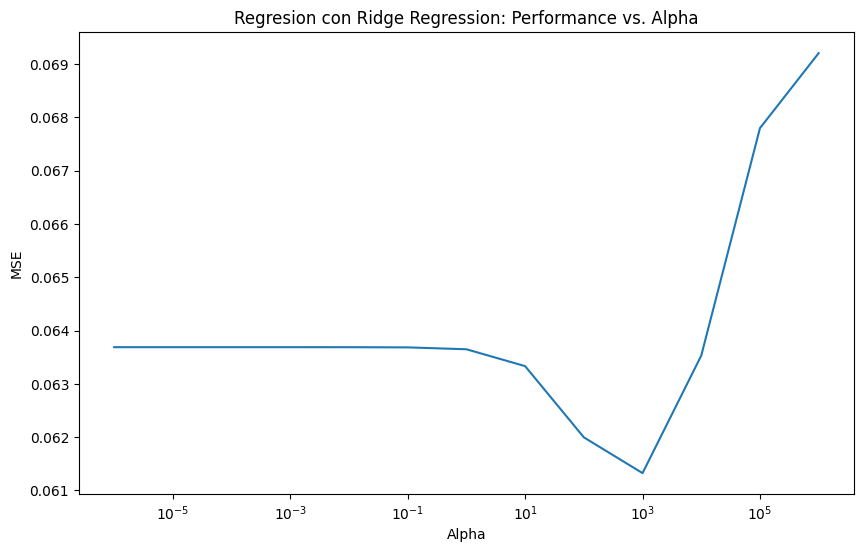

In [68]:
import matplotlib.pyplot as plt

# Usando los resultados de GridSearchCV
cv_results = grid_search.cv_results_
alphas = cv_results['param_alpha'].data
mean_scores = -cv_results['mean_test_score']  # Negativo porque GridSearchCV minimiza

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, mean_scores)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Regresion con Ridge Regression: Performance vs. Alpha')
plt.show()

In [69]:
# Matriz de valores de alfa
alphas = 10**np.linspace(6,-2,50)*0.5
np.set_printoptions(suppress = True)
alphas

array([500000.        , 343324.42250215, 235743.31817287, 161872.87714088,
       111149.82412631,  76320.89835876,  52405.65670773,  35984.28365006,
        24708.56680662,  16966.10885948,  11649.75905258,   7999.29359803,
         5492.70570994,   3771.56003168,   2589.73733962,   1778.24015311,
         1221.02654727,    838.41646841,    575.69769966,    395.30216055,
          271.43377197,    186.37968602,    127.97739613,     87.87553124,
           60.33963203,     41.43213864,     28.44933015,     19.53469969,
           13.41347898,      9.21034985,      6.32427608,      4.34255687,
            2.98181166,      2.04745753,      1.40588435,      0.96534886,
            0.66285568,      0.45514909,      0.3125276 ,      0.21459671,
            0.14735259,      0.10117948,      0.06947477,      0.04770477,
            0.03275643,      0.02249216,      0.01544422,      0.01060475,
            0.00728174,      0.005     ])

In [70]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train_2004_transformed, y_train_2004)
    coefs.append(ridge.coef_)

ValueError: x and y can be no greater than 2D, but have shapes (50,) and (50, 1, 54)

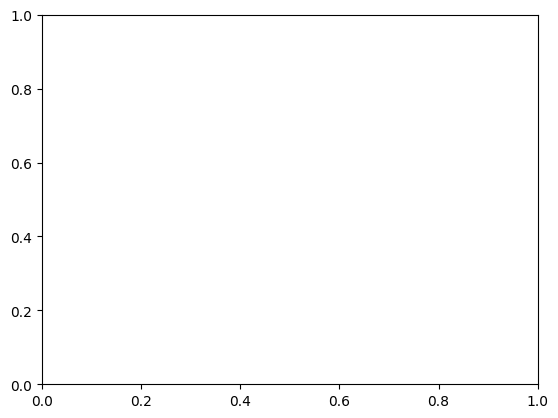

In [71]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [72]:
#plot Lasso, coeficientes segun el valor de alpha
coefs = []
for a in alphas:
    l1_2004 = Lasso(alpha=a, fit_intercept=False, max_iter=100000)
    l1_2004.fit(X_train_2004_transformed, y_train_2004)
    coefs.append(l1_2004.coef_)

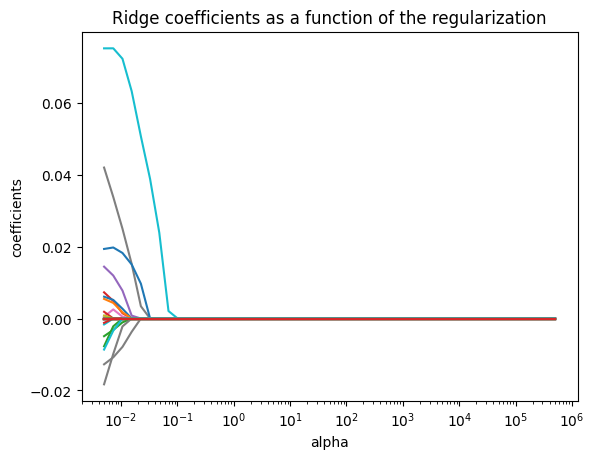

In [73]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

Aca hago Lasso con CV

In [74]:
# Usamos cross-validation para dividir la muestra en training y validation sets
lassocv = LassoCV(alphas=alphas, cv=5, max_iter=100000, random_state=100)
lassocv.fit(X_train_2004_transformed, y_train_2004)
print("Alpha óptimo:", lassocv.alpha_)

# Ahora estimamos nuevamente el modelo con el alpha (lambda) óptimo
l1_2004 = Lasso(alpha=lassocv.alpha_)
l1_2004.fit(X_train_2004_transformed, y_train_2004)
L1_pred_2004 = l1_2004.predict(X_test_2004_transformed)

print("Error cuadrático medio: ", mean_squared_error(y_test_2004, L1_pred_2004))
print("Coeficientes del mejor modelo:")
pd.Series(l1_2004.coef_, index=X_train_2004_transformed.columns)

# Para guardarlo en un dataframe...
coeficientes_finales = pd.DataFrame([np.array(X_train_2004_transformed.columns.tolist()),l1_2004.coef_]).T
coeficientes_finales.columns = ['feature','coeficiente']
print(f"El modelo final cuenta con: {coeficientes_finales[coeficientes_finales['coeficiente']!=0].shape[0]}",'features' )
coeficientes_finales

Alpha óptimo: 0.007281742387506222
Error cuadrático medio:  0.06691789139204252
Coeficientes del mejor modelo:
El modelo final cuenta con: 14 features


c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,feature,coeficiente
0,ch06,-0.0
1,v5_m,0.0
2,v11_m,-0.0
3,v12_m,0.00488
4,ipcf,-0.0
5,ix_tot,0.0
6,ix_mayeq10,0.002522
7,itf,-0.010785
8,Año,0.0
9,PEA,0.075098


Entonces, quedamos que para Ridge el alpha es 1 y para Lasso el lambda es 0.005 (esto es antes de hacer las dummies)

Evaluamos la performance de los modelos con ridge y lasso

In [75]:
print("Error cuadrático medio con Ridge: ", mean_squared_error(y_test_2004, L2_pred_2004))
print("Error cuadrático medio con Lasso: ", mean_squared_error(y_test_2004, L1_pred_2004))

Error cuadrático medio con Ridge:  0.06587055174053999
Error cuadrático medio con Lasso:  0.06691789139204252


Si yo quiero elegir entre ridge y lasso, tengo que hacer el ECM de CV tanto de ridge como de lasso, decidir cual usar y despues calcular error de testeo

In [76]:
# Primero realizamos la regresión logística para el 2004 con RIDGE
# Ajustamos el clasificador con el metodo fit() 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
log_reg_2004 = LogisticRegression(penalty = "l2", C=1.0, solver = "liblinear").fit(X_train_2004, y_train_2004)

# Y predecimos la variable dependiente para el 2004
y_test_pred_score_2004 = log_reg_2004.predict_proba(X_test_2004)[:,1]
y_test_pred_2004 = log_reg_2004.predict(X_test_2004)

# Calculamos la matriz de confusión
conf_matrix_log_2004 = confusion_matrix(y_test_2004, y_test_pred_2004)

# Calculamos AUC y ROC
auc_log_2004 = roc_auc_score(y_test_2004, y_test_pred_score_2004)
print('AUC de la regresión logística para los datos del 2004: %.4f' % auc_log_2004)
fpr_log_2004, tpr_log_2004, thresholds_log_2004 = roc_curve(y_test_2004, y_test_pred_score_2004, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_log_2004)
print('FPR:', fpr_log_2004)
print('TPR:', tpr_log_2004)

AUC de la regresión logística para los datos del 2004: 0.8809
Thresholds: [       inf 0.60978004 0.60081133 ... 0.00000012 0.00000001 0.        ]
FPR: [0.         0.         0.00053533 ... 0.99892934 0.99946467 1.        ]
TPR: [0.         0.00591716 0.00591716 ... 1.         1.         1.        ]


c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ahora hago todo para 2024


In [77]:
# Ridge para 2024
# prueba con alpha = 1
alpha = 1
print("Alpha:", alpha)

l2 = Ridge(alpha = alpha)
l2.fit(X_train_2024_transformed, y_train_2024)             
L2_pred_2024 = l2.predict(X_test_2024_transformed)
ecm_a1_2024 = mean_squared_error(y_test_2024, L2_pred_2024)

print("Error cuadrático medio: ", ecm_a1_2024)   
print("Coeficientes del modelo:")
print(pd.Series(l2.coef_, index = X_train_2024_transformed.columns)) 

Alpha: 1
Error cuadrático medio:  0.03602625394907898
Coeficientes del modelo:


ValueError: Length of values (1) does not match length of index (53)

In [78]:
#hago lasso con cv para 2024
lassocv = LassoCV(alphas=alphas, cv=5, max_iter=100000, random_state=100)
lassocv.fit(X_train_2024_transformed, y_train_2024)
print("Alpha óptimo:", lassocv.alpha_)

# Ahora estimamos nuevamente el modelo con el alpha (lambda) óptimo
l1 = Lasso(alpha=lassocv.alpha_)
l1.fit(X_train_2024_transformed, y_train_2024)
L1_pred_2024 = l1.predict(X_test_2024_transformed)

print("Error cuadrático medio: ", mean_squared_error(y_test_2024, L1_pred_2024))
print("Coeficientes del mejor modelo:")
pd.Series(l1.coef_, index=X_train_2024_transformed.columns)

# Para guardarlo en un dataframe...
coeficientes_finales = pd.DataFrame([np.array(X_train_2024_transformed.columns.tolist()),l1.coef_]).T
coeficientes_finales.columns = ['feature','coeficiente']
print(f"El modelo final cuenta con: {coeficientes_finales[coeficientes_finales['coeficiente']!=0].shape[0]}",'features' )
coeficientes_finales

Alpha óptimo: 0.005
Error cuadrático medio:  0.03656394708002925
Coeficientes del mejor modelo:
El modelo final cuenta con: 14 features


c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,feature,coeficiente
0,ch06,-0.0
1,v5_m,-0.0
2,v11_m,0.002394
3,v12_m,0.00139
4,ipcf,-0.001688
5,ix_tot,-0.0
6,ix_mayeq10,0.0
7,itf,-0.0
8,Año,0.0
9,PEA,0.039734


In [79]:
print("ECM de 2024")
print("Error cuadrático medio con Ridge: ", mean_squared_error(y_test_2024, L2_pred_2024))
print("Error cuadrático medio con Lasso: ", mean_squared_error(y_test_2024, L1_pred_2024))

ECM de 2024
Error cuadrático medio con Ridge:  0.03602625394907898
Error cuadrático medio con Lasso:  0.03656394708002925


Ahora hago las regresiones logisticas para 2024

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [81]:
# Primero realizamos la regresión logística para el 2024 con RIDGE
log_reg_2024 = LogisticRegression(penalty = "l2", C=1.0, solver = "liblinear").fit(X_train_2024, y_train_2024)

# Y predecimos la variable dependiente para el 2024
y_test_pred_score_2024 = log_reg_2024.predict_proba(X_test_2024)[:,1]
y_test_pred_2024 = log_reg_2024.predict(X_test_2024)

# Calculamos la matriz de confusión
conf_matrix_log_2024 = confusion_matrix(y_test_2024, y_test_pred_2024)

# Calculamos AUC y ROC
auc_log_2024 = roc_auc_score(y_test_2024, y_test_pred_score_2024)
print('AUC de la regresión logística para los datos del 2004: %.4f' % auc_log_2024)
fpr_log_2024, tpr_log_2024, thresholds_log_2024 = roc_curve(y_test_2024, y_test_pred_score_2024, drop_intermediate=False)  # drop_intermediate=False nos da mas thresholds ('c') para probar
print('Thresholds:', thresholds_log_2024)
print('FPR:', fpr_log_2024)
print('TPR:', tpr_log_2024)

AUC de la regresión logística para los datos del 2004: 0.5994
Thresholds: [       inf 0.49859063 0.20701536 ... 0.00001969 0.         0.        ]
FPR: [0.         0.00050556 0.00101112 ... 0.99898888 0.99949444 1.        ]
TPR: [0. 0. 0. ... 1. 1. 1.]


c:\Users\s1290226\AppData\Local\anaconda3\envs\TereL\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
